In [ ]:
#data cleaning challenge 2 
#https://www.kaggle.com/code/chrisbow/cleaning-data-with-python-challenge-day-2

#data scaling and normalising 
#https://www.kaggle.com/code/alexisbcook/scaling-and-normalization
#scaling: change the range of data so two arraies become comparable. Ex. dollars vs yen 
#normalisation: change the shape of data to have normal distribution 

In [17]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

kickstart = pd.read_csv('/Users/wuchunting/Desktop/python/data cleaning challenge 2/data file/ks-projects-201801.csv',encoding = 'utf-8')

print(kickstart.shape)

# set seed for reproducibility
np.random.seed(0)

kickstart.head(5)


(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


/Users/wuchunting/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wuchunting/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalised Data')

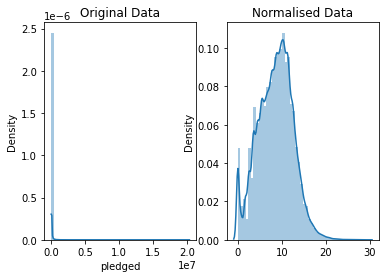

In [15]:
#creating a boolean masek, getting only 'True' value in the column pledged (value that are more than 0 in this case)
indexOfPositivePledged = kickstart.pledged > 0

#use .loc[] to select rows where pledged value is more than 0 
#positivePledged is a Series
#When extracing a column or multiple columns from a dataframe, the assigned variable is normally a Series 
positivePledged = kickstart.pledged.loc[indexOfPositivePledged]

# normalise the pledges (w/ Box-Cox)
normalisedPledged = stats.boxcox(positivePledged)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(positivePledged, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalisedPledged, ax=ax[1])
ax[1].set_title("Normalised Data")


/Users/wuchunting/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wuchunting/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalised Data')

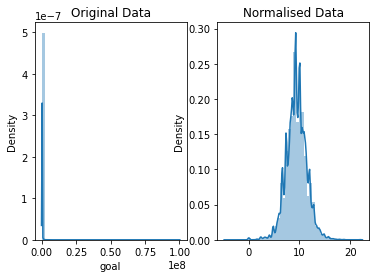

In [20]:
#getting boolean mask from column goal
indexOfPositiveGoal = kickstart.goal > 0

positiveGoal = kickstart.goal.loc[indexOfPositiveGoal]

normalisedGoal =  stats.boxcox(positiveGoal)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(positiveGoal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalisedGoal, ax=ax[1])
ax[1].set_title("Normalised Data")